In [82]:
import numpy as np

In [83]:
num_objects = 2

In [84]:
rue_motion_parameters = [{"loc_0": (1.3, 1.0), "vel": (0.1,-0.8)},
                          {"loc_0": (1.1, -1.3), "vel": (0.1,0.8)}]

In [85]:
observed_parameters = [{"color": "red", "err": 0.020},
                       {"color": "blue", "err": 0.050}]
n_obs = 500

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
np.random.seed(43)
s = np.random.standard_cauchy(n_obs) + np.random.normal(scale=0.05,size=n_obs)
s = (s[(s>0) & (s<50)] + 1)
delta_time = s
times = delta_time.cumsum()
times[:10]

array([  1.7183969 ,   2.99805595,   6.01507321,   8.26765107,
         9.27932066,  10.27991777,  11.83396172,  14.01714165,
        15.35044307,  17.37663346])

In [94]:
true_positions = []
obs_positions = []
for obj, obs in zip(true_motion_parameters,observed_parameters):
    x = times*obj["vel"][0]/365.25 + obj["loc_0"][0]
    y = times*obj["vel"][1]/365.25 + obj["loc_0"][1]
    true_positions.append((x,y))
    obs_positions.append((x + np.random.normal(scale=obs["err"],size=len(times)),y + np.random.normal(scale=obs["err"],size=len(times))))

Text(0,0.5,'y position')

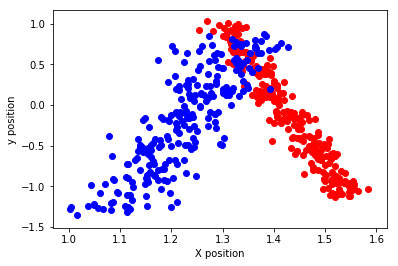

In [95]:
plt.scatter(obs_positions[0][0], obs_positions[0][1],c=observed_parameters[0]["color"])
plt.scatter(obs_positions[1][0], obs_positions[1][1],c=observed_parameters[1]["color"])
plt.xlabel("X position")
plt.ylabel("y position")

In [96]:
import pandas as pd

In [97]:
df = pd.DataFrame()

In [98]:
df["red_pos_X"] = obs_positions[0][0]
df["red_pos_Y"] = obs_positions[0][1]
df["blue_pos_X"] = obs_positions[1][0]
df["blue_pos_Y"] = obs_positions[1][1]
df["t"] = times
df = df.set_index("t")

In [99]:
df.to_csv("location_data_hw9_2018.csv",index_label="t")

In [100]:
!head location_data_hw9_2018.csv

t,red_pos_X,red_pos_Y,blue_pos_X,blue_pos_Y
1.718396903641703,1.3301735961457015,0.9935642451774511,1.081699834012192,-1.2959179751031422
2.998055954146877,1.310404431547636,1.0127720792761834,1.0049968450436904,-1.2543940232315547
6.01507321358367,1.2703120369866738,1.0283862739184186,1.1136959029978442,-1.3212565699300398
8.26765107217987,1.3311306313337534,0.9482227142755478,1.0018453465563593,-1.2852085972439224
9.279320656039637,1.346158981620144,0.9634850225184447,1.1130075799398527,-1.261146559950236
10.27991777117844,1.3251398456423034,0.9767830889088128,1.0819956950560674,-1.201582393648549
11.833961719611134,1.3171628558935138,0.9258395176615511,1.1179585370878828,-1.2835179688768672
14.017141647789263,1.337333069009279,0.9471139377514582,1.1531431458772692,-1.2454995839654792
15.350443066599395,1.2938029456756,0.9807903538244169,1.056927585327275,-1.2616519917771667


In [102]:
!pwd

/Users/jbloom/Classes/python-seminar/Homeworks/attic_2016_homework/hw_8
